In [1]:
import sys
sys.path.append('../../MembraneQuant')
from membranequant import *
%matplotlib notebook

### Import

In [2]:
basepath = '/Users/blandt/Desktop/Data/PAR2 RING mutants experiment 2/Experiment'
paths = direcslist(basepath, 1)
conditions = [p.split('/')[-2].split('_')[1] for p in paths]

imgs = [load_image(p + '/af_corrected.tif') for p in paths]
imgs_flat = [load_image(p + '/af_corrected_flat.tif') for p in paths]
imgs_3channel = [load_image(p + '/af_corrected_3channel.tif') for p in paths]
imgs_3channel_flat = [load_image(p + '/af_corrected_3channel_flat.tif') for p in paths]

rois = [np.loadtxt(p + '/ROI_fit.txt') for p in paths]
cytbg = np.loadtxt('../T2A/cytbg.txt')
# membg = np.loadtxt('membg.txt')

### Straighten

In [3]:
imgs_straight = [straighten(i, r, 50, ninterp=500) for i, r in zip(imgs, rois)]
profiles = [bounded_mean_2d(s, [0.9, 0.1]) for s in imgs_straight]
profiles_norm = [p / bounded_mean_1d(p, [0.9, 1]) for p in profiles]

### Testing

In [4]:
# profiles = [bounded_mean_2d(s, [0.95, 0.05]) for s in imgs_straight]
# profiles_norm = [p / bounded_mean_1d(p, [0.9, 1]) for p in profiles]
# # profiles_norm = [p / max(p) for p in profiles]

# profiles_ant = [bounded_mean_2d(s, [0.4, 0.6]) for s in imgs_straight]
# profiles_ant_norm = [p / bounded_mean_1d(p, [0.9, 1]) for p in profiles_ant]

# profiles_diff = [p1 - p2 for p1, p2 in zip(profiles, profiles_ant)]
# profiles_diff_norm = [p / bounded_mean_1d(p, [0.9, 1]) for p in profiles_diff]
# profiles_diff_norm = [p / max(p) for p in profiles_diff]

In [5]:
# fig, ax = plt.subplots()
# for p in profiles_diff:
#     ax.plot(p)

In [6]:
# def func(ax, condition, c):
#     all_profiles = []
#     for cond, pr in zip(conditions, profiles_diff_norm):
#         if cond == condition:
# #             ax.plot(pr, c=c, alpha=0.1)
#             all_profiles.append(pr)
#     mean_profile = np.mean(np.array(all_profiles), axis=0)
#     std_profile = np.std(np.array(all_profiles), axis=0)
#     ax.plot(mean_profile, c=c)
#     ax.fill_between(np.arange(len(mean_profile)), mean_profile - std_profile, mean_profile + std_profile, 
#                                 color=c, alpha=0.2)

In [7]:
# fig, ax = plt.subplots()
# func(ax, 'nwg325', 'k')
# func(ax, 'nwg338', 'r')
# func(ax, 'nwg240', 'b')
# func(ax, 'nwg400', 'g')
# ax.set_ylim(bottom=0)

In [8]:
# fig, ax = plt.subplots()
# func(ax, 'nwg325bal', 'k')
# func(ax, 'nwg338bal', 'r')
# func(ax, 'nwg240bal', 'b')
# func(ax, 'nwg400bal', 'g')
# ax.set_ylim(bottom=0)

In [9]:
# fig, ax = plt.subplots()
# func(ax, 'nwg325', 'k')
# func(ax, 'nwg325bal', 'r')
# ax.set_ylim(bottom=0)

In [10]:
# membg = np.loadtxt('mem_profile.txt')
# fig, ax = plt.subplots()
# func(ax, 'nwg325', 'k')
# func(ax, 'nwg325bal', 'r')
# ax.set_ylim(bottom=0)
# ax.plot(interp_1d_array(membg, 500))

### Figs

<IPython.core.display.Javascript object>


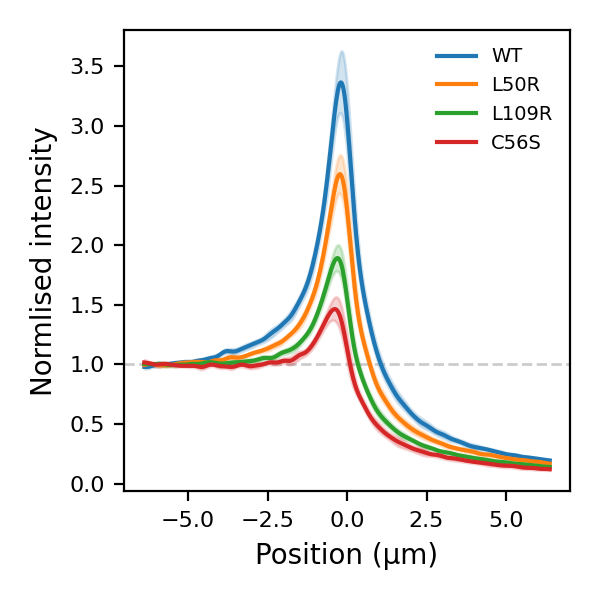

In [20]:
def func(condition, ax, c, label):
    _profiles = np.fliplr(np.array([p for p, c in zip(profiles_norm, conditions) if c == condition])) #/ 10000
    profile_mean = np.mean(_profiles, axis=0)
    profile_std = np.std(_profiles, axis=0)
    ax.plot(0.255 * np.linspace(-25, 25, 500), profile_mean, c=c, label=label)
    ax.fill_between( 0.255 * np.linspace(-25, 25, 500), profile_mean - profile_std, profile_mean + profile_std, 
                   color=c, alpha=0.2)
    
 
fig, ax = plt.subplots()
func('nwg325', ax, 'tab:blue', 'WT')
func('nwg400', ax, 'tab:orange', 'L50R')
func('nwg338', ax, 'tab:green', 'L109R')
func('nwg240', ax, 'tab:red', 'C56S')
ax.axhline(1, linestyle='--', c='0.8', linewidth=1, zorder=0)
ax.legend(fontsize=7, frameon=False)
ax.tick_params(axis='both', labelsize=8)
ax.set_xlabel('Position (μm)')
ax.set_ylabel('Normlised intensity')
# ax.set_ylim(0, 4)
fig.set_size_inches(3, 3)
fig.tight_layout()
fig.savefig('Figs/profiles.png', dpi=600, transparent=True)

### C56S cis acting

<IPython.core.display.Javascript object>


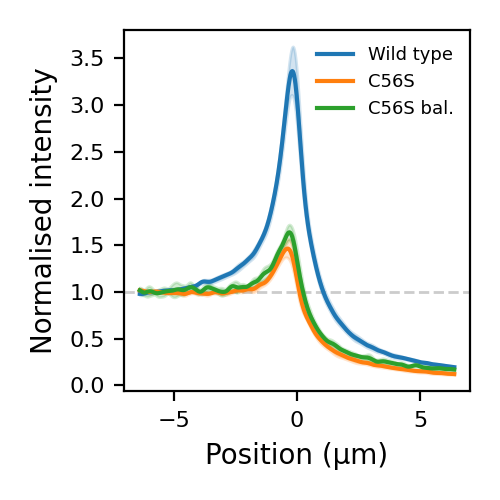

In [19]:
fig, ax = plt.subplots()
func('nwg325', ax, 'tab:blue', 'Wild type')
func('nwg240', ax, 'tab:orange', 'C56S')
# func('nwg325bal', ax, 'tab:green', 'mNG::WT / mNG::WT')
func('nwg240bal', ax, 'tab:green', 'C56S bal.')
ax.axhline(1, linestyle='--', c='0.8', linewidth=1, zorder=0)
ax.legend(fontsize=6.5, frameon=False)
ax.tick_params(axis='both', labelsize=8)
ax.set_xlabel('Position (μm)')
ax.set_ylabel('Normalised intensity')
# ax.set_ylim(0, 4)
fig.set_size_inches(2.5, 2.5)
fig.tight_layout()
fig.savefig('Figs/profiles_c56s_cis.png', dpi=600, transparent=True)